## Problem 2

Run set up (code block directly below) once before running other code blocks 

In [1]:
#set up
import qiskit
provider = qiskit.IBMQ.load_account()
from qiskit.tools.jupyter import *
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.visualization import plot_histogram
# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

The function `prepare(N)` prepares a quantum circuit with the appropriate states as if caused by phase kickback varphi

In [16]:
import numpy as np
import math

varphi = np.random.rand()
#varphi = math.floor(varphi*8)/8                         #uncomment to get exact binary fraction varphi
print ("varphi =", varphi)


def prepare(varphi):
    circ = QuantumCircuit(3,3)
    circ.h(0)
    circ.h(1)
    circ.h(2)
    circ.u1(2*math.pi*4*varphi, 0)
    circ.u1(2*math.pi*2*varphi, 1)
    circ.u1(2*math.pi*1*varphi, 2)
    return circ
 

#explanation of R_k the hermitian conjugate of R_k = R_k^{dagger}, is equivalent to taking the complex conjugate of R_k elementwise
#, the only element affected is e^... and conjugate of e^... is e^-...

circ = prepare(varphi)
circ.h(0)
circ.cu1(-1*2*math.pi/4, 0, 1)
circ.h(1)
circ.cu1(-1*2*math.pi/8, 0, 2)
circ.cu1(-1* 2*math.pi/4, 1, 2)
circ.h(2)
circ.barrier(range(3))
circ.measure(range(3), range(3))
circ.draw()





varphi = 0.7550753856739043


┌───┐┌────────────┐┌───┐                                   ░ ┌─┐      
q_0: ┤ H ├┤ U1(18.977) ├┤ H ├─■────────────■────────────────────░─┤M├──────
     ├───┤├────────────┤└───┘ │-pi/2 ┌───┐ │                    ░ └╥┘┌─┐   
q_1: ┤ H ├┤ U1(9.4886) ├──────■──────┤ H ├─┼───────■────────────░──╫─┤M├───
     ├───┤├────────────┤             └───┘ │-pi/4  │-pi/2 ┌───┐ ░  ║ └╥┘┌─┐
q_2: ┤ H ├┤ U1(4.7443) ├───────────────────■───────■──────┤ H ├─░──╫──╫─┤M├
     └───┘└────────────┘                                  └───┘ ░  ║  ║ └╥┘
c_0: ══════════════════════════════════════════════════════════════╩══╬══╬═
                                                                      ║  ║ 
c_1: ═════════════════════════════════════════════════════════════════╩══╬═
                                                                         ║ 
c_2: ════════════════════════════════════════════════════════════════════╩═

The following code simulates the above quantum circuit on a simulator hosted by IBM, then a histogram is plotted of the estimated phase (varphi).

{'010': 1, '000': 1, '111': 2, '110': 1017, '101': 2, '001': 1} 

000 : 0.0
001 : 0.125
010 : 0.25
101 : 0.625
110 : 0.75
111 : 0.875
varphi = 0.7550753856739043


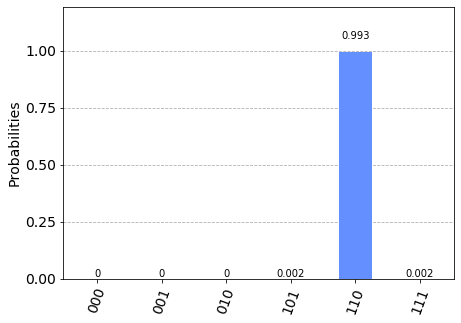

In [25]:
job_sim = execute(circ, backend_sim, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()
counts = result_sim.get_counts(circ)
print(counts, "\n")

for i in sorted(counts.keys()):
    print(i, ":",  int(i, 2)/8)
print ("varphi =", varphi)

plot_histogram(counts)